In [43]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [44]:
import numpy as np
import pandas as pd

In [45]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [46]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [47]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [48]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [49]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [50]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [51]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [52]:
columns_m = inspect(engine).get_columns('measurement')
for c in columns_m:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [53]:
columns_s= inspect(engine).get_columns('station')
for c in columns_s:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [54]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

query = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

In [55]:
# Calculate the date 1 year ago from the last data point in the database

year1_last=  dt.date(2017, 8, 23) - dt.timedelta(days=365)

print("One Year Ago: ", year1_last)

One Year Ago:  2016-08-23


In [56]:
# Perform a query to retrieve the data and precipitation scores

precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > year1_last).order_by(Measurement.date.desc()).all()

In [57]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precip_frame = pd.DataFrame(precipitation).set_index('date')

In [66]:
# Sort the dataframe by date

precip_frame = pd.DataFrame(precipitation).sort_index()
precip_frame.head()

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


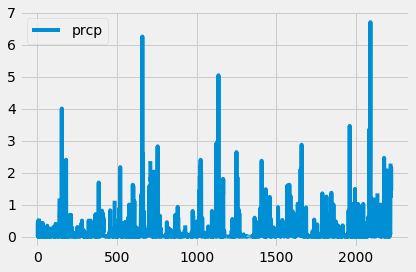

In [68]:
# Use Pandas Plotting with Matplotlib to plot the data

precip_frame.plot()
plt.tight_layout()
plt.show()

![precipitation](Images/precipitation.png)

In [69]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precip_frame.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

![precipitation](Images/station-histogram.png)